In [32]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [33]:
#import dataset
df = pd.read_csv('D:\BID.csv')
df = df[['Price']]
df = df.dropna() 
df = df.reset_index(drop=True)
df

,Price
0,11054.8
1,10574.2
2,9973.4
3,10213.7
4,10153.6
...,...
2466,41500.0
2467,41000.0
2468,41200.0
2469,41300.0


In [34]:
#check stationary
from statsmodels.tsa.stattools import adfuller
adf1 = adfuller(df['Price'], regression ='c', maxlag=30)
print("ADF stat: %f" % adf1[0])
print("p-value: %f" % adf1[1])

ADF stat: -1.211208
p-value: 0.668756


In [35]:
#differencing data
adf2 = adfuller(np.diff(df['Price']), regression ='n', maxlag=30)
print("ADF stat: %f" % adf2[0])
print("p-value: %f" % adf2[1])

ADF stat: -51.349869
p-value: 0.000000


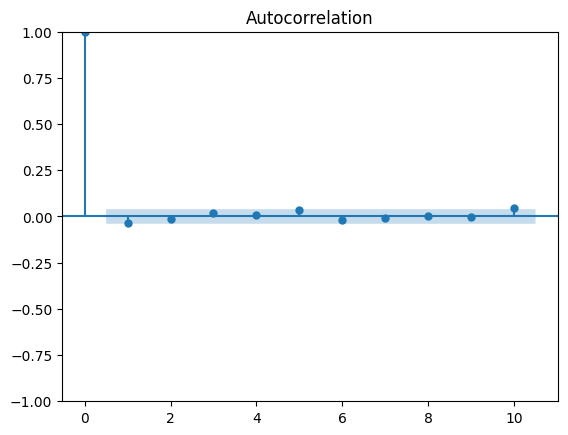

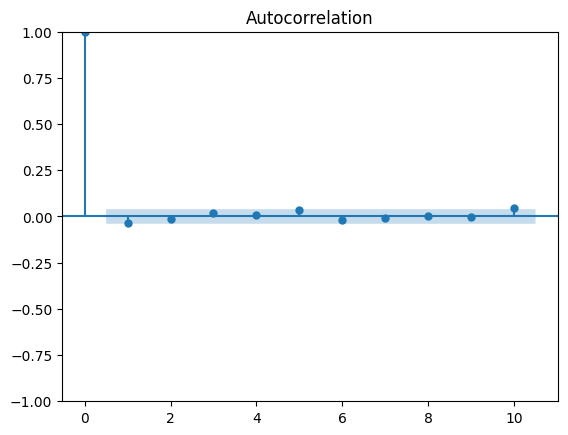

In [36]:
#ACF
sm.tsa.acf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_acf(np.diff(df['Price']),lags=10)

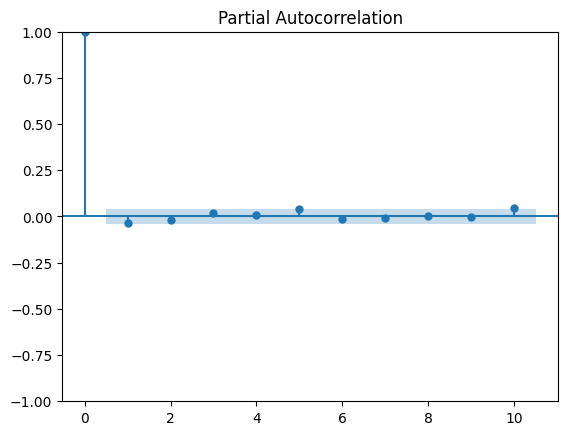

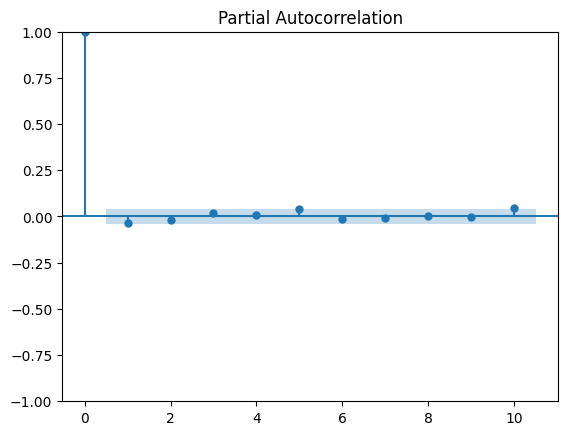

In [37]:
#PACF
sm.tsa.pacf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_pacf(np.diff(df['Price']),lags=10)

In [38]:
#RATIO 7:3

In [39]:
#data splitting ratio: 7:3
train_size73 = int(0.7 * len(df))
test_size73 = int(0.3 * len(df)) 
train_data73 = df[:train_size73]
test_data73 = df[train_size73 : train_size73 + test_size73]

In [40]:
train_data73


,Price
0,11054.8
1,10574.2
2,9973.4
3,10213.7
4,10153.6
...,...
1724,36266.6
1725,36928.1
1726,37628.5
1727,37395.1


In [41]:
#Training data ratio 7:3
x_train73 = np.array(train_data73.index).reshape(-1, 1)
y_train73 = np.array(train_data73['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model73 = auto_arima(y_train73, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit73 = model73.fit(y_train73)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26494.797, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26490.899, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26492.891, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26492.894, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26490.469, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26492.280, Time=0.48 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.031 seconds


In [42]:
x_train73

array([[   0],
       [   1],
       [   2],
       ...,
       [1726],
       [1727],
       [1728]], dtype=int64)

In [43]:
#Testing process ratio 7:3 
x_test73 = np.array(test_data73.index).reshape(-1, 1)
y_test73 = np.array(test_data73['Price'])
y_pred73 = model73.predict(n_periods=len(y_test73))

In [44]:
#creating prediction for next 30 days ratio 7:3
last_index73 =  df.index[-1]
last_data73 =pd.RangeIndex(start=last_index73, stop=last_index73+30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days73 = np.array(range(last_index73 + 1, last_index73 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days73 = model73.predict(len(x_next_30_days73))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days73)

Predicted prices for the next 30 days: 
[37909.5 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5
 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5
 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5 37909.5
 37909.5 37909.5 37909.5]


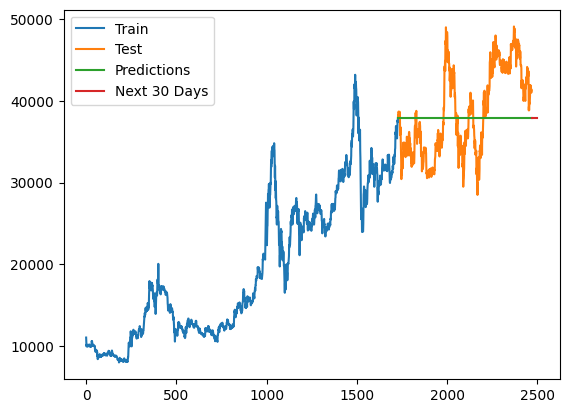

In [45]:
#Show plot ratio 7:3
plt.plot(train_data73.index, train_data73['Price'])
plt.plot(test_data73.index, test_data73['Price'])
plt.plot(test_data73.index, y_pred73)

plt.plot(last_data73,y_next_30_days73)
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days'])
plt.show()

In [46]:
#RATIO 8:2

In [47]:
#data splitting ratio: 8:2
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df)) 
train_data82 = df[:train_size82]
test_data82 = df[train_size82 : train_size82 + test_size82]

In [48]:
#Training data ratio 8:2
x_train82 = np.array(train_data82.index).reshape(-1, 1)
y_train82 = np.array(train_data82['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model82 = auto_arima(y_train82, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit82 = model82.fit(y_train82)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30467.557, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30462.179, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30463.965, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30463.978, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30461.190, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30465.791, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.724 seconds


In [49]:
#Testing process ratio 8:2 
x_test82 = np.array(test_data82.index).reshape(-1, 1)
y_test82 = np.array(test_data82['Price'])
y_pred82 = model82.predict(n_periods=len(y_test82))

In [50]:
#creating prediction for next 30 days ratio 8:2
last_index82 =  df.index[-1]
last_data82 =pd.RangeIndex(start=last_index82, stop=last_index82 + 30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days82 = np.array(range(last_index82 + 1, last_index82 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days82 = model82.predict(len(x_next_30_days82))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days82)

Predicted prices for the next 30 days: 
[35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200.
 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200.
 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200. 35200.]


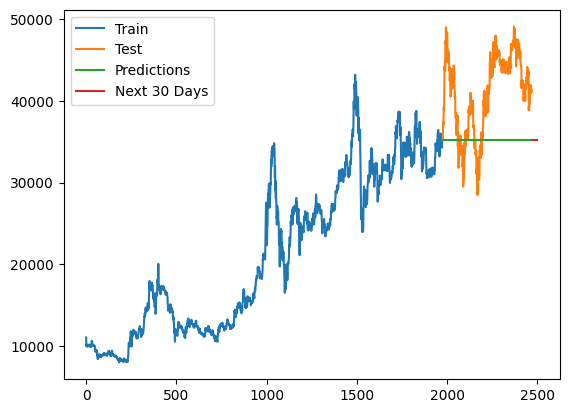

In [51]:
#Show plot ratio 8:2
plt.plot(train_data82.index, train_data82['Price'])
plt.plot(test_data82.index, test_data82['Price'])
plt.plot(test_data82.index, y_pred82)

plt.plot(last_data82,y_next_30_days82)
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days'])
plt.show()

In [52]:
#RATIO 9:1

In [53]:
#data splitting ratio: 9:1
train_size91 = int(0.9 * len(df))
test_size91 = int(0.1 * len(df)) 
train_data91 = df[:train_size91]
test_data91 = df[train_size91 : train_size91+ test_size91]

In [54]:
#Training data ratio 9:1
x_train91 = np.array(train_data91.index).reshape(-1, 1)
y_train91 = np.array(train_data91['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model91 = auto_arima(y_train91, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit91 = model91.fit(y_train91)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=34834.352, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=34827.043, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34828.378, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=34828.386, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34825.980, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=34830.370, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.370 seconds


In [55]:
#Testing process ratio 9:1 
x_test91 = np.array(test_data91.index).reshape(-1, 1)
y_test91 = np.array(test_data91['Price'])
y_pred91 = model91.predict(n_periods=len(y_test91))

In [56]:
#creating prediction for next 30 days ratio 9:1
last_index91 =  df.index[-1]
last_data91 =pd.RangeIndex(start=last_index91, stop=last_index91 + 30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days91 = np.array(range(last_index91 + 1, last_index91 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days91 = model91.predict(len(x_next_30_days91))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days91)

Predicted prices for the next 30 days: 
[39000. 39000. 39000. 39000. 39000. 39000. 39000. 39000. 39000. 39000.
 39000. 39000. 39000. 39000. 39000. 39000. 39000. 39000. 39000. 39000.
 39000. 39000. 39000. 39000. 39000. 39000. 39000. 39000. 39000. 39000.]


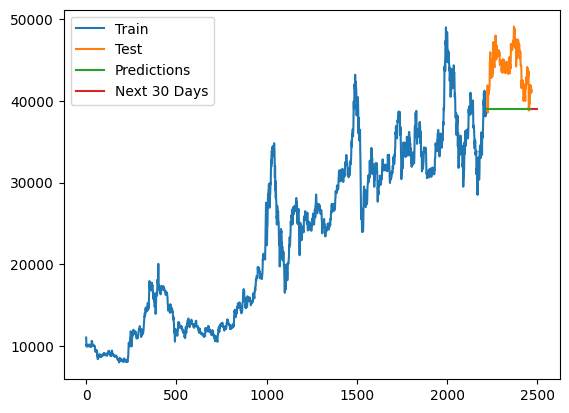

In [57]:
#Show plot ratio 9:1
plt.plot(train_data91.index, train_data91['Price'])
plt.plot(test_data91.index, test_data91['Price'])
plt.plot(test_data91.index, y_pred91)

plt.plot(last_data91,y_next_30_days91)
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days'])
plt.show()

In [58]:
#ACCURACY EVALUATION

In [59]:
#method to calculate mape
def calc_mape(actual, predicted):

    # Convert to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate absolute percentage error
    absolute_error = np.abs((actual - predicted) / actual)
    
    # Handle division by zero cases
    absolute_error[np.isinf(absolute_error)] = 0.0
    
    # Calculate mean absolute percentage error
    mape = np.mean(absolute_error) * 100
    
    return mape

In [60]:
#accuracy evaluate 7:3
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle

test_rmse73 = np.sqrt(np.mean((y_pred73 - y_test73)**2))
test_mape73 = calc_mape(y_test73, y_pred73)
test_mae73 = mae(y_test73, y_pred73)
test_msle73 = msle(y_test73, y_pred73)

print(round(test_rmse73,3))
print(round(test_mape73,3))
print(round(test_mae73,3))
print(round(test_msle73,3))


5308.424
11.952
4651.689
0.019


In [61]:
#accuracy evaluate 8:2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle


test_rmse82 = np.sqrt(np.mean((y_pred82 - y_test82)**2))
test_mape82 = calc_mape(y_test82, y_pred82)
test_mae82 = mae(y_test82, y_pred82)
test_msle82 = msle(y_test82, y_pred82)

print(round(test_rmse82,3))
print(round(test_mape82,3))
print(round(test_mae82,3))
print(round(test_msle82,3))


7542.693
15.081
6516.397
0.036


In [62]:
#accuracy evaluate 9:1
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle

test_rmse91 = np.sqrt(np.mean((y_pred91 - y_test91)**2))
test_mape91 = calc_mape(y_test91, y_pred91)
test_mae91 = mae(y_test91, y_pred91)
test_msle91 = msle(y_test91, y_pred91)


print(round(test_rmse91,3))
print(round(test_mape91,3))
print(round(test_mae91,3))
print(round(test_msle91,3))


5675.077
11.584
5223.077
0.018
